Hente og lagre data fra JSON data fra ulike APIer, lagre som CSV og JSON filer.

import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()
api_key2 = os.getenv("API_KEY2")
url = os.getenv("DATABASER_URL")

#hente og importere data fra API
#Bruker KEY og env slik at dataene ikke skal blir publisert på GIT

url = "https://api.openweathermap.org/data/2.5/weather?q={Trondheim}&appid={your api key}"


In [9]:
import json
import requests
from datetime import datetime, timedelta
import pandas as pd
import os
from dotenv import load_dotenv


load_dotenv()
client_id = os.getenv('API_KEY3') #Gjør dette med enn .env fil
print(client_id)
endpoint = os.getenv('DATABASE_URL3')

parameters = {
    "sources" : "SN68860", 
    "elements" : "mean(air_temperature P1D), mean(air_pressure_at_sea_level P1D), sum(precipitation_amount P1D), mean(wind_speed P1D)",     
    "referencetime" : "2020-03-10/2025-03-19",
}

r = requests.get(endpoint, params = parameters, auth=(client_id, None))

if r.status_code ==200:
    json_data = r.json()
    print("Data hentet fra Frost API")
else: 
    error_msg = r.json().get("error", {}).get("message", "Ukjent feil")
    error_reason = r.json().get("error", {}).get("reason", "Ingen grunn spesifert")
    raise ValueError(f"API-feil: {r.status_code}\nMelding: {error_msg}\nÅrsak: {error_reason}")


vaerdata = []
for entry in json_data.get("data", []):
    timestamp = entry.get("referenceTime", "Ukjent tidspunkt")
    observations = entry.get("observations", [])
    
    weather_entry = {"Tidspunkt" : timestamp}
    for obs in observations: 
        element = obs.get("elementId", "Ukjent element")
        value = obs.get("value", "Ukjent verdi")
        weather_entry[element] = value

    vaerdata.append(weather_entry)

df = pd.DataFrame(vaerdata)

df.dropna(how = "all", subset=df.columns[1:], inplace=True)

df.to_csv("trondheim_vaerdata_full.csv", index = False, encoding="utf-8")

print("data lagret i trondheim_vaerdata_full.csv")

print(df.head())

print(type(df["mean(air_temperature P1D)"][4]))

  

a5e627de-9361-4e32-a3c8-953adfcbaa85
Data hentet fra Frost API
data lagret i trondheim_vaerdata_full.csv
                  Tidspunkt  mean(air_temperature P1D)  \
0  2020-03-10T00:00:00.000Z                        3.6   
1  2020-03-11T00:00:00.000Z                        4.5   
2  2020-03-12T00:00:00.000Z                        3.9   
3  2020-03-13T00:00:00.000Z                        0.0   
4  2020-03-14T00:00:00.000Z                       -3.8   

   mean(air_pressure_at_sea_level P1D)  sum(precipitation_amount P1D)  \
0                                988.7                            0.4   
1                                980.6                            0.1   
2                                980.5                            0.1   
3                               1005.4                            6.7   
4                               1011.1                            4.5   

   mean(wind_speed P1D)  
0                   3.0  
1                   3.0  
2                   2.0  
3  

In [10]:
#Lagrer til en JSON-fil
with open("miljodata.json", "w", encoding = "utf-8") as f:  #åpner og oppretter en fil for skriving, med gitt navn. Hvis filen allerede finnes, vil den bli overskrevet. 
        json.dump(vaerdata, f, indent = 4, ensure_ascii=False )     #Tar et python-objekt og skriver det til en fil i JSON-format. Indent= 4 gir mellomrom for hvert nivå. Spesialtegn blir skrevet ut riktig med ascii

print("Data lagret som miljodata.json")  



Data lagret som miljodata.json


In [11]:
#sjekker hva slags data som er lagret

with open("miljodata.json", "r", encoding = "utf-8") as f:  #åpner filen for lesing, encoding sikrer at alle tegn håndteres korrekt
    data = json.load(f) #leser  JSON-data fra filen f og konverterer den til et python-objekt som lagres i variabelen data

print(json.dumps(data, indent=4)) #skriver ut innholdet i filen på en lesbar måte

[
    {
        "Tidspunkt": "2020-03-10T00:00:00.000Z",
        "mean(air_temperature P1D)": 3.6,
        "mean(air_pressure_at_sea_level P1D)": 988.7,
        "sum(precipitation_amount P1D)": 0.4,
        "mean(wind_speed P1D)": 3
    },
    {
        "Tidspunkt": "2020-03-11T00:00:00.000Z",
        "mean(air_temperature P1D)": 4.5,
        "mean(air_pressure_at_sea_level P1D)": 980.6,
        "sum(precipitation_amount P1D)": 0.1,
        "mean(wind_speed P1D)": 3
    },
    {
        "Tidspunkt": "2020-03-12T00:00:00.000Z",
        "mean(air_temperature P1D)": 3.9,
        "mean(air_pressure_at_sea_level P1D)": 980.5,
        "sum(precipitation_amount P1D)": 0.1,
        "mean(wind_speed P1D)": 2
    },
    {
        "Tidspunkt": "2020-03-13T00:00:00.000Z",
        "mean(air_temperature P1D)": 0,
        "mean(air_pressure_at_sea_level P1D)": 1005.4,
        "sum(precipitation_amount P1D)": 6.7,
        "mean(wind_speed P1D)": 3.1
    },
    {
        "Tidspunkt": "2020-03-14T00:00:

OPPGAVE 3

In [12]:
import pandas as pd 


#identifisere og håndtere databehandling

#identifisere verdier som mangler 
#sjekker hvor mange verdier som mangler i hver kolonne
df = pd.read_csv("trondheim_vaerdata_full.csv")
print(df.isnull().sum())

#fylle inn manglende verdier basert på type data
#numeriske verdier, mean() og median() for å fylle ut hullene


df.fillna({
    "mean(air_temperature P1D)": df["mean(air_temperature P1D)"].median(), 
    "mean(air_pressure_at_sea_level P1D)": df["mean(air_pressure_at_sea_level P1D)"].median(), 
    "sum(precipitation_amount P1D)": df["sum(precipitation_amount P1D)"].fillna(0), #null nedbor
    "mean(wind_speed P1D)": df["mean(wind_speed P1D)"]. fillna(df["mean(wind_speed P1D)"].mean())
}, inplace =True)


#interpolerer for å finne ut manglende verdier
df.interpolate(method = 'linear', inplace= True)


Tidspunkt                              0
mean(air_temperature P1D)              0
mean(air_pressure_at_sea_level P1D)    0
sum(precipitation_amount P1D)          0
mean(wind_speed P1D)                   0
dtype: int64


C:\Users\frida\AppData\Local\Temp\ipykernel_44740\126067788.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method = 'linear', inplace= True)


In [13]:
#Bruker list comprehensions for effektiv datamanipilering

#kategorisering av temperatur
df["TemperaurKategori"] = ["Kaldt" if temp < 10
                            else "Mildt" if temp < 20 
                            else "Vamrt" for temp in df["mean(air_temperature P1D)"]]

#kategorisering av vind
df["VindKategori"] = ["Vindstille" if vind < 2
                      else "Lett bris" if vind < 10
                      else "Sterk vind" if vind < 20
                      else "storm"for vind in df["mean(wind_speed P1D)"]]


#Kategorisering av trykk
df["TrykkKategori"] = ["Høytrykk" if trykk > 1013
                       else "Lavtrykk" for trykk in df["mean(air_pressure_at_sea_level P1D)"]]

#Kategorisering av nedbor
df["NedborKategori"] = ["Tørt" if nedbor == 0
                        else "Lett regn" if nedbor < 5
                        else "Mye regn " if nedbor < 20
                        else "Ekstrem vær" for nedbor in df["sum(precipitation_amount P1D)"]]

df.head()  #skriver ut de fem øverste



,Tidspunkt,mean(air_temperature P1D),mean(air_pressure_at_sea_level P1D),sum(precipitation_amount P1D),mean(wind_speed P1D),TemperaurKategori,VindKategori,TrykkKategori,NedborKategori
0,2020-03-10T00:00:00.000Z,3.6,988.7,0.4,3.0,Kaldt,Lett bris,Lavtrykk,Lett regn
1,2020-03-11T00:00:00.000Z,4.5,980.6,0.1,3.0,Kaldt,Lett bris,Lavtrykk,Lett regn
2,2020-03-12T00:00:00.000Z,3.9,980.5,0.1,2.0,Kaldt,Lett bris,Lavtrykk,Lett regn
3,2020-03-13T00:00:00.000Z,0.0,1005.4,6.7,3.1,Kaldt,Lett bris,Lavtrykk,Mye regn
4,2020-03-14T00:00:00.000Z,-3.8,1011.1,4.5,3.9,Kaldt,Lett bris,Lavtrykk,Lett regn


In [14]:
#Manipulerer dataene effektivt med pandas sql

from pandasql import sqldf

query = """ 
SELECT Tidspunkt, "mean(air_temperature P1D)", "sum(precipitation_amount P1D)", "mean(wind_speed P1D)"
FROM df 
WHERE "mean(air_temperature P1D)" > 20 AND "sum(precipitation_amount P1D)"==0 AND "mean(wind_speed P1D)" < 5
ORDER BY "mean(air_temperature P1D)", "sum(precipitation_amount P1D)",  "mean(wind_speed P1D)"DESC
"""

df_warm_days = sqldf(query, locals())  # Finner den varmeste dagen
print(df_warm_days)


                   Tidspunkt  mean(air_temperature P1D)  \
0   2024-07-21T00:00:00.000Z                       20.2   
1   2020-06-25T00:00:00.000Z                       20.5   
2   2023-06-21T00:00:00.000Z                       20.6   
3   2023-08-20T00:00:00.000Z                       20.8   
4   2020-06-17T00:00:00.000Z                       21.0   
5   2024-05-24T00:00:00.000Z                       21.5   
6   2024-05-23T00:00:00.000Z                       21.6   
7   2024-05-26T00:00:00.000Z                       21.6   
8   2020-06-18T00:00:00.000Z                       21.6   
9   2023-06-20T00:00:00.000Z                       21.6   
10  2022-06-26T00:00:00.000Z                       21.9   
11  2023-06-19T00:00:00.000Z                       22.0   
12  2024-08-07T00:00:00.000Z                       22.2   
13  2022-07-01T00:00:00.000Z                       22.3   
14  2020-06-27T00:00:00.000Z                       22.5   
15  2022-06-27T00:00:00.000Z                       23.1 

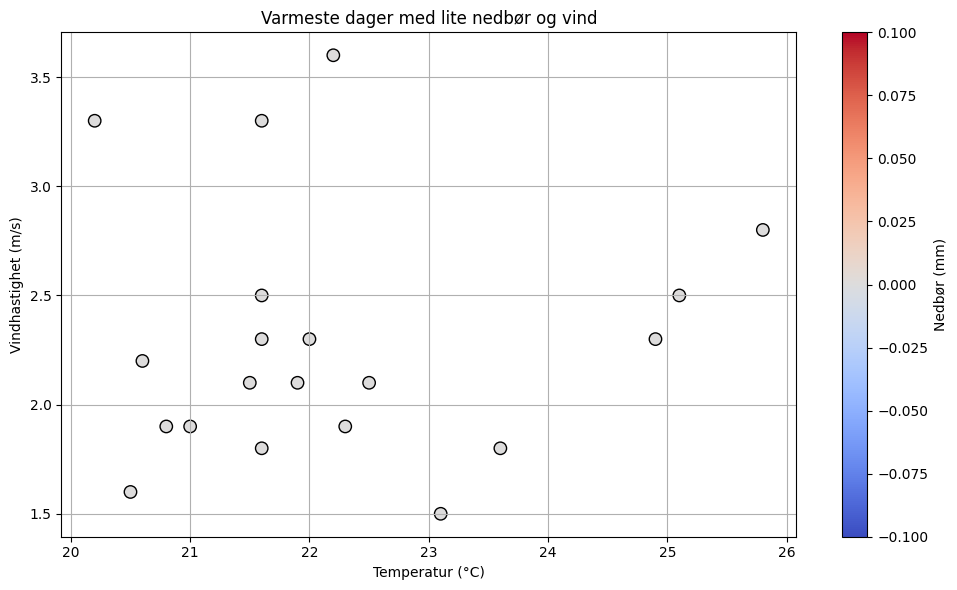

In [45]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_warm_days["mean(air_temperature P1D)"],
            df_warm_days["mean(wind_speed P1D)"],
            c=df_warm_days["sum(precipitation_amount P1D)"],
            cmap="coolwarm",
            s=80, #størrrelse på punktprikken
            edgecolors="k")

plt.xlabel("Temperatur (°C)")
plt.ylabel("Vindhastighet (m/s)")
plt.title("Varmeste dager med lite nedbør og vind")
plt.colorbar(label="Nedbør (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


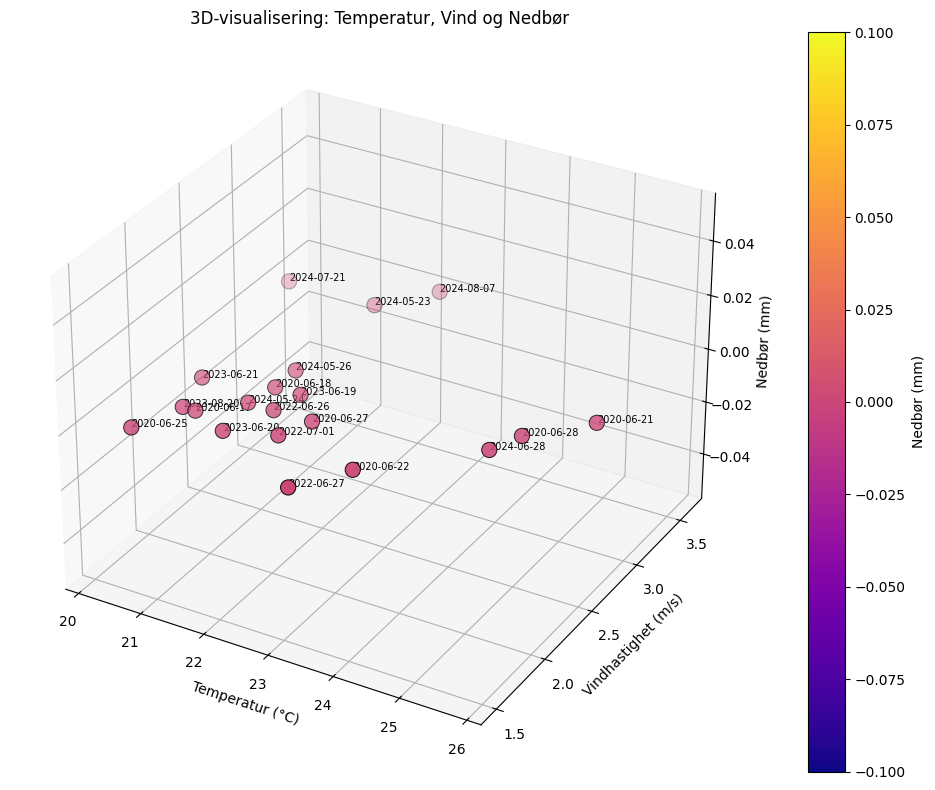

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Konverter til datetime viss det nødvendig
df_warm_days["Tidspunkt"] = pd.to_datetime(df_warm_days["Tidspunkt"])

# Lage plottet som #D for å få opp datoene mere oversiktlig ifht nedbør, vind og temperatur
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = df_warm_days["mean(air_temperature P1D)"]
y = df_warm_days["mean(wind_speed P1D)"]
z = df_warm_days["sum(precipitation_amount P1D)"]
labels = df_warm_days["Tidspunkt"].dt.strftime("%Y-%m-%d")

# Legger til en tydelig farge slik punketene viser tydelig, fargen endrer seg etter nedbørskalen, altså jo mindre vind
scatter = ax.scatter(x, y, z, 
                     c=z, 
                     cmap="plasma",   
                     s=120,           # større storleik på prikkene / punktet
                     edgecolors="black", 
                     linewidths=0.7)

# Legge til datoene på punktet
for i in range(len(df_warm_days)):
    ax.text(x.iloc[i], y.iloc[i], z.iloc[i], labels.iloc[i], size=7, zorder=1)

# titler på aksene
ax.set_xlabel("Temperatur (°C)")
ax.set_ylabel("Vindhastighet (m/s)")
ax.set_zlabel("Nedbør (mm)")
ax.set_title("3D-visualisering: Temperatur, Vind og Nedbør")

# Farge på kolonna med nedbør
fig.colorbar(scatter, label="Nedbør (mm)")

plt.tight_layout()
plt.show()



In [36]:
#HÅNDTERING AV UREGELMESSIGHETER
#værdata som kan være feilmålinger, som ekstreme temperaturer osv, plutselig hopp
df = df[(df["mean(air_temperature P1D)"] > -50) & (df["mean(air_temperature P1D)"] < 50)]
df  = df[(df["sum(precipitation_amount P1D)"]>=0) & (df["sum(precipitation_amount P1D)"]<100)]
df = df[(df["mean(wind_speed P1D)"]> 0) & (df["mean(wind_speed P1D)"]< 45)]

#erstatt feil med NaN
df.replace(-9999, None, inplace=True)
df["TempDiff"] = df["mean(air_temperature P1D)"].diff() #beregn differansen mellom hver måling
df["UnormalHoppTemp"] = df["TempDiff"].apply(lambda x: "Ja" if abs(x) > 10 else "Nei") #Markerer plutselige endringer


df["PressureDiff"] = df["mean(air_pressure_at_sea_level P1D)"].diff() #differanse mellom hver måling
df["UnormalHoppPressure"] = df["PressureDiff"].apply(lambda x: "Ja" if abs(x) > 100 else "Nei") #Markerer plutselige endringer

df["Wind_speedDiff"] = df["mean(wind_speed P1D)"].diff()  #differanse mellom hver måling
df["UnormalHoppWind"] = df["Wind_speedDiff"].apply(lambda x: "Ja" if abs(x) > 10 else "Nei") #Markerer plutselige endringer

df["NedborDiff"] = df["sum(precipitation_amount P1D)"].diff()  #differanse mellom hver måling
df["UnormalHoppNedbor"] = df["NedborDiff"].apply(lambda x: "Ja" if abs(x) > 10 else "Nei") #Markerer plutselige endringer


DEL 2 

In [37]:
#OPPGAVE 4 DATAANALYSE

import numpy as np

gjennomsnitt_temp = np.mean(df["mean(air_temperature P1D)"])
median_temp = np.median(df["mean(air_temperature P1D)"])
std_temp = np.std(df["mean(air_temperature P1D)"])      #avvik fra gjennomsnitt/ hvor spredt dataene er
df["mean(air_temperature P1D)"]

gjennomsnitt_pressure = np.mean(df["mean(air_pressure_at_sea_level P1D)"])
median_pressure = np.median(df["mean(air_pressure_at_sea_level P1D)"])
std_pressure = np.std(df["mean(air_pressure_at_sea_level P1D)"])

gjennomsnitt_wind = np.mean(df["mean(wind_speed P1D)"])
median_wind = np.median(df["mean(wind_speed P1D)"])
std_wind = np.std(df["mean(wind_speed P1D)"])

gjennomsnitt_nedbor = np.mean(df["sum(precipitation_amount P1D)"])
median_nedbor = np.median(df["sum(precipitation_amount P1D)"])
std_nedbor = np.std(df["sum(precipitation_amount P1D)"])

print(f"Gjennomsnittlig temperatur: {gjennomsnitt_temp: .2f}°C") #printer med 2 desimaler
print(f"Median temperatur: {median_temp: .2f}°C")
print(f"Standardavvik temperatur {std_temp: .2f}°C")

print(f"Gjennomsnittlig trykk: {gjennomsnitt_pressure: .2f} hPa")
print(f"Median trykk: {median_pressure: .2f}hPa")
print(f"Standardavvik trykk {std_pressure: .2f}hPa")

print(f"Gjennomsnittlig vind: {gjennomsnitt_wind: .2f}m/s")
print(f"Median vind: {median_wind: .2f}m/s")
print(f"Standardavvik vind {std_wind: .2f}°m/s")

print(f"Gjennomsnittlig nedbør: {gjennomsnitt_nedbor: .2f}mm")
print(f"Median nedbør: {median_nedbor: .2f}mm")
print(f"Standardavvik nedbør {std_nedbor: .2f}mm")

print(df.columns)

Gjennomsnittlig temperatur:  6.20°C
Median temperatur:  6.00°C
Standardavvik temperatur  7.38°C
Gjennomsnittlig trykk:  1010.33 hPa
Median trykk:  1010.90hPa
Standardavvik trykk  12.18hPa
Gjennomsnittlig vind:  2.49m/s
Median vind:  2.20m/s
Standardavvik vind  1.14°m/s
Gjennomsnittlig nedbør:  2.63mm
Median nedbør:  0.40mm
Standardavvik nedbør  5.10mm
Index(['Tidspunkt', 'mean(air_temperature P1D)',
       'mean(air_pressure_at_sea_level P1D)', 'sum(precipitation_amount P1D)',
       'mean(wind_speed P1D)', 'TemperaurKategori', 'VindKategori',
       'TrykkKategori', 'NedborKategori', 'TempDiff', 'UnormalHoppTemp',
       'PressureDiff', 'UnormalHoppPressure', 'Wind_speedDiff',
       'UnormalHoppWind', 'NedborDiff', 'UnormalHoppNedbor'],
      dtype='object')


In [38]:
#implementerer statistisk analyse for sammenheng mellom to variabler i datasettet
#Sjekker sammenheng mellom temperatur og lufttrykk ved å beregne korrelasjonskoeffessient
#Sjekker dette for å se om høytrykk og høy temperatur har en sammenheng

korrelasjon = df["mean(air_temperature P1D)"].corr(df["mean(air_pressure_at_sea_level P1D)"])
print(f"Korrelasjon mellom temperatur og trykk: {korrelasjon:.2f}")

Korrelasjon mellom temperatur og trykk: 0.08


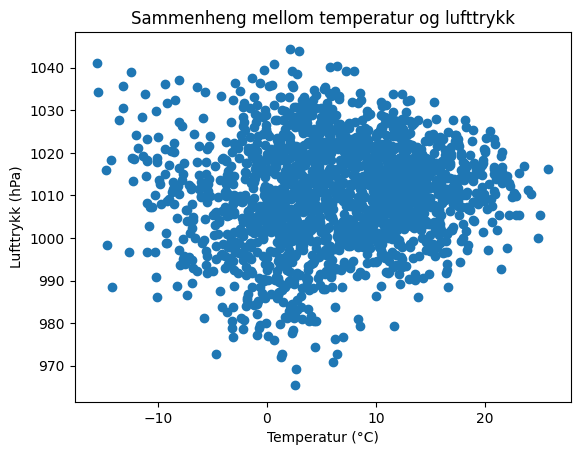

In [39]:
#Visualiserer sammenhengen mellom temperatur og trykk

import matplotlib.pyplot as plt

plt.scatter(df["mean(air_temperature P1D)"], df["mean(air_pressure_at_sea_level P1D)"])
plt.xlabel("Temperatur (°C)")
plt.ylabel("Lufttrykk (hPa)")
plt.title("Sammenheng mellom temperatur og lufttrykk")
plt.show()

                     Tidspunkt  mean(air_temperature P1D)  \
103  2020-06-21 00:00:00+00:00                       25.8   
110  2020-06-28 00:00:00+00:00                       25.1   
1571 2024-06-28 00:00:00+00:00                       24.9   
104  2020-06-22 00:00:00+00:00                       23.6   
839  2022-06-27 00:00:00+00:00                       23.1   
109  2020-06-27 00:00:00+00:00                       22.5   
843  2022-07-01 00:00:00+00:00                       22.3   
1611 2024-08-07 00:00:00+00:00                       22.2   
1196 2023-06-19 00:00:00+00:00                       22.0   
838  2022-06-26 00:00:00+00:00                       21.9   

      mean(wind_speed P1D)  sum(precipitation_amount P1D)  
103                    2.8                            0.0  
110                    2.5                            0.0  
1571                   2.3                            0.0  
104                    1.8                            0.0  
839                    1.5  

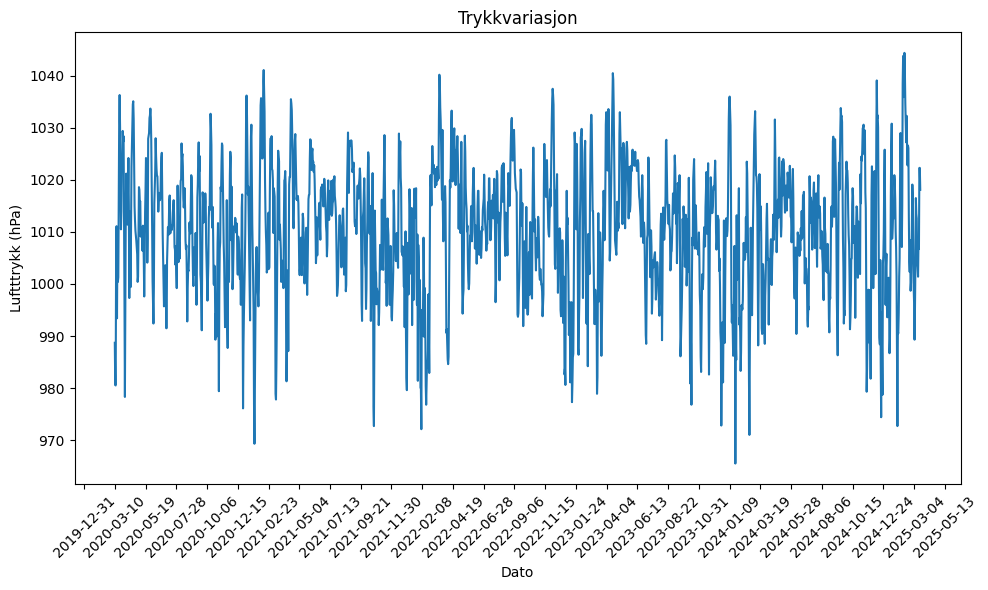

In [40]:
#Filtrerer på varme dager med lav vind og null nedbør

filtrert_df = df[(df["mean(air_temperature P1D)"] > 20) & 
            (df["mean(wind_speed P1D)"] < 5 ) &
            (df["sum(precipitation_amount P1D)"]== 0)]

#sorterer etter varmeste først
filtrert_df = filtrert_df.sort_values("mean(air_temperature P1D)", ascending = False).head(10)
print(filtrert_df[["Tidspunkt", "mean(air_temperature P1D)", "mean(wind_speed P1D)", "sum(precipitation_amount P1D)"]])


#tegner dataen i plot

import matplotlib.dates as mdates

plt.figure(figsize= (10, 6))
plt.plot(df["Tidspunkt"], df["mean(air_pressure_at_sea_level P1D)"], label = "Lufttrykk")
plt.xlabel("Dato")
plt.ylabel("Luftttrykk (hPa)")
plt.title("Trykkvariasjon")
plt.xticks(rotation = 45)

#Viser bare en dato pr måned

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval= 10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

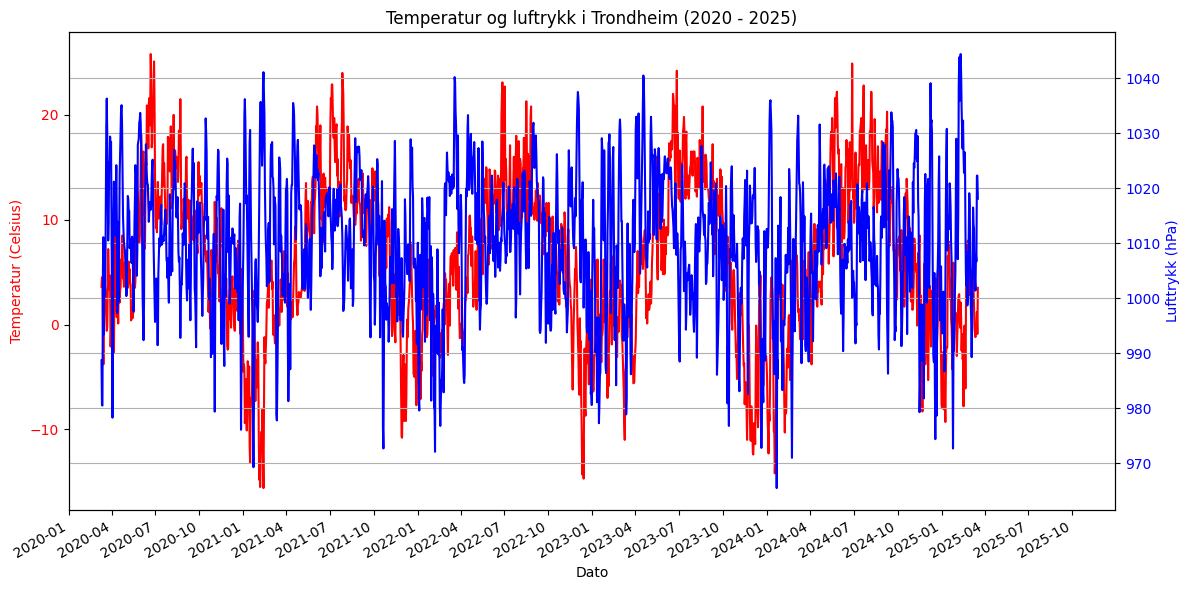

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df["Tidspunkt"] = pd.to_datetime(df["Tidspunkt"])
fig, ax1 = plt.subplots(figsize= (12,6))

ax1.plot(df["Tidspunkt"], df["mean(air_temperature P1D)"], color = "red", label = "Temperatur")
ax1.set_xlabel("Dato")
ax1.set_ylabel("Temperatur (Celsius)", color = "red")
ax1.tick_params(axis= "y", labelcolor = "red")

#andre y_akse (trykk)
ax2 = ax1.twinx()
ax2.plot(df["Tidspunkt"], df["mean(air_pressure_at_sea_level P1D)"], 
         color = "blue", label = "Lufttrykk (hPa)")
ax2.set_ylabel("Lufttrykk (hPa)", color = "blue")
ax2.tick_params(axis = "y", labelcolor = "blue")

#Tidsakse med kvartalsvis visning
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.set_xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2025-12-31"))

#Tittel og layout
plt.title("Temperatur og luftrykk i Trondheim (2020 - 2025)")
fig.autofmt_xdate()
fig.tight_layout()
plt.grid(True)

plt.show()


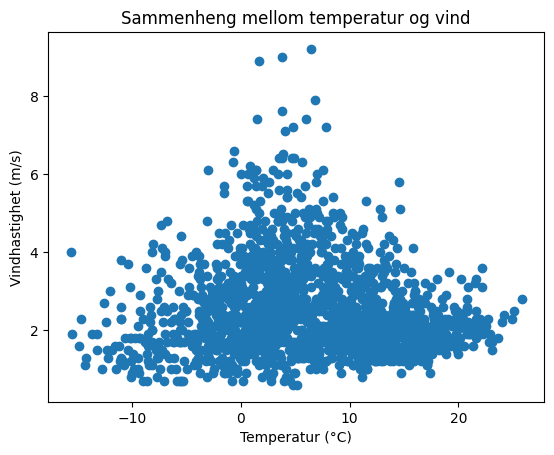

In [42]:
#scatterplot for temperatur vs vind
plt.scatter(df["mean(air_temperature P1D)"], df["mean(wind_speed P1D)"])
plt.xlabel("Temperatur (°C)")
plt.ylabel("Vindhastighet (m/s)")
plt.title("Sammenheng mellom temperatur og vind")
plt.show()

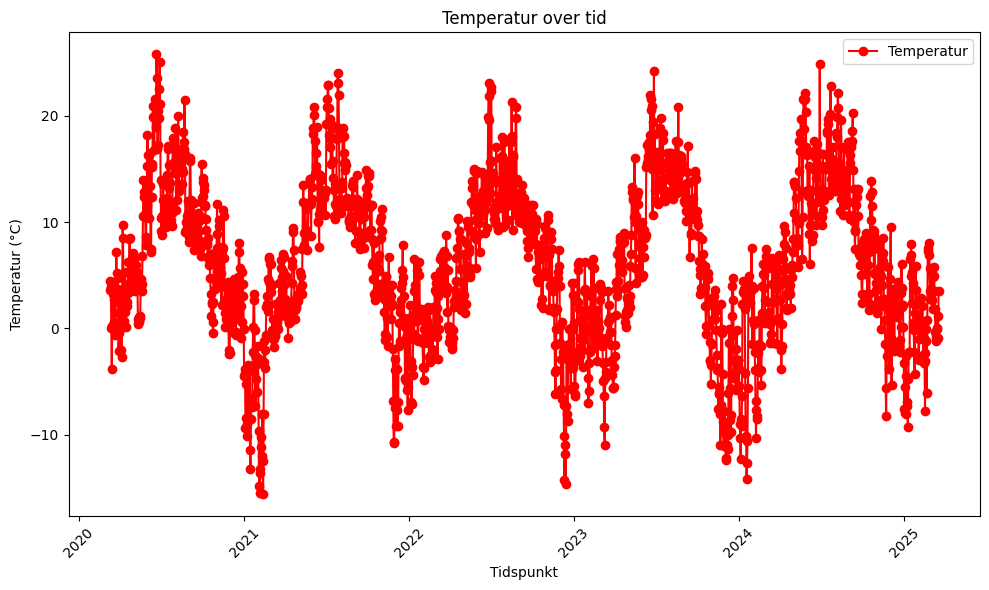

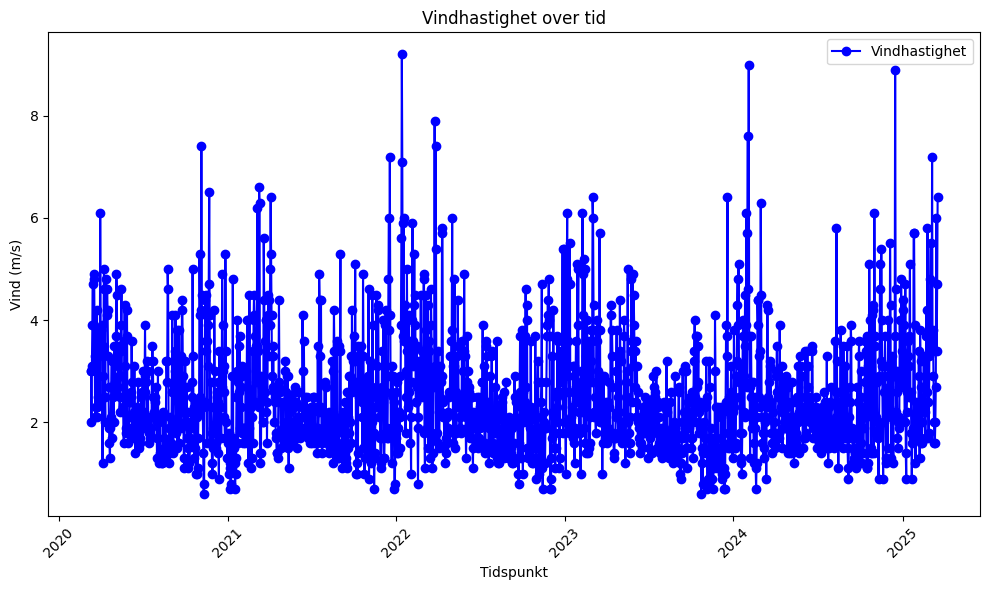

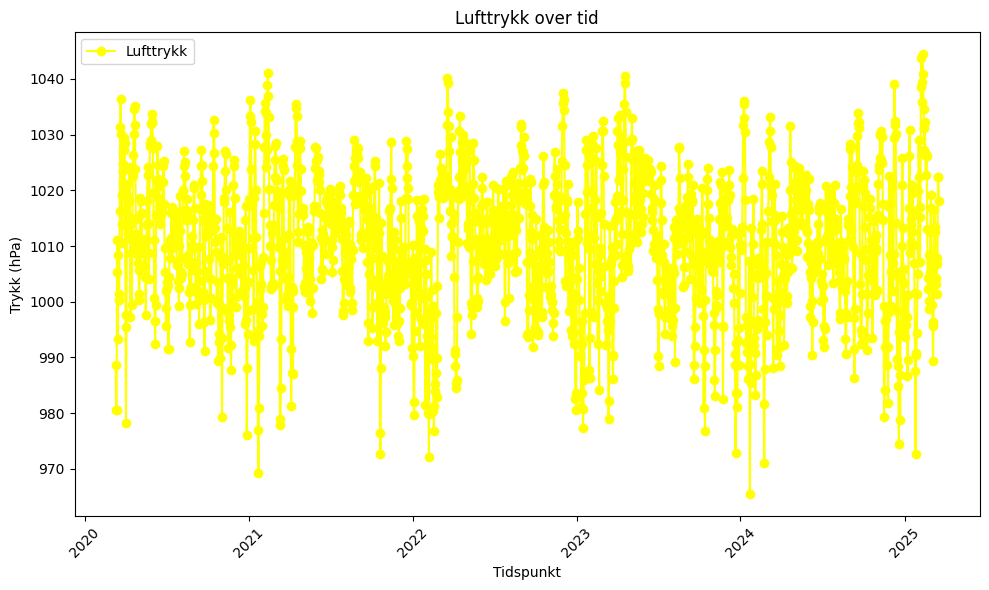

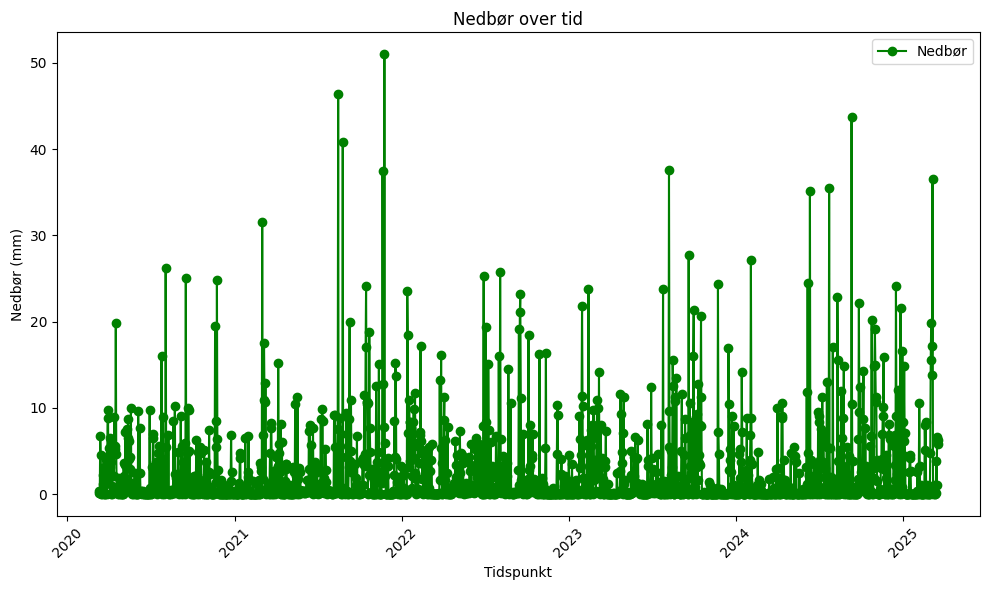

In [43]:
import matplotlib.pyplot as plt

#temperaturplot
plt.figure(figsize = (10,6))
plt.plot(df['Tidspunkt'], df['mean(air_temperature P1D)'], color= 'red',marker = "o", linestyle = "-", label = "Temperatur")
plt.title("Temperatur over tid")
plt.xlabel("Tidspunkt")
plt.ylabel("Temperatur (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Vindhastighetsplot
plt.figure(figsize=(10,6))
plt.plot(df['Tidspunkt'], df['mean(wind_speed P1D)'], color= 'blue',marker = "o", linestyle = "-", label = "Vindhastighet")
plt.title("Vindhastighet over tid")
plt.xlabel("Tidspunkt")
plt.ylabel("Vind (m/s)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Trykkplot
plt.figure(figsize=(10,6))
plt.plot(df['Tidspunkt'], df['mean(air_pressure_at_sea_level P1D)'], color= 'yellow',marker = "o", linestyle = "-", label = "Lufttrykk")
plt.title("Lufttrykk over tid")
plt.xlabel("Tidspunkt")
plt.ylabel("Trykk (hPa)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#Nedbørplot
plt.figure(figsize=(10,6))
plt.plot(df['Tidspunkt'], df['sum(precipitation_amount P1D)'], color= 'green',marker = "o", linestyle = "-", label = "Nedbør")
plt.title("Nedbør over tid")
plt.xlabel("Tidspunkt")
plt.ylabel("Nedbør (mm)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
 